In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#path = r"M:\Ales\Rovné podmínky\equal lim export.tsv"
path= r"D:\ales_data_tmp.tsv"
df = pd.read_csv(path, sep="\t", decimal=",")#, nrows=50)

In [4]:
len(df)

75189064

In [5]:
df.head()

,NLRT,OP_ID,CLIENT_ID,P,NABER,V,C_LIMIT
0,D,1109016642,10798881,1,1500.0,0.042,1.862
1,D,1110071212,10746892,1,200.0,0.016,2.707
2,C,1109608679,10370826,1,10.0,0.004,1.000
3,C,1110046607,10244098,1,13.0,0.004,1.000
4,E,1110068386,11599244,1,3000.0,0.037,4.375


In [34]:
set(df.NLRT)

{'A', 'B', 'C', 'D', 'E', nan}

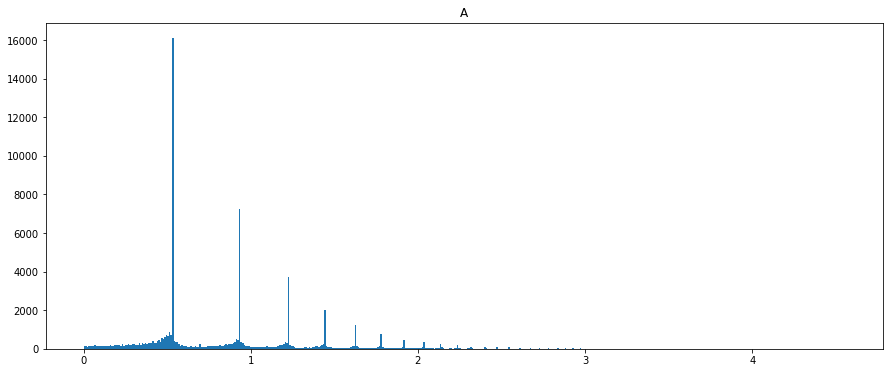

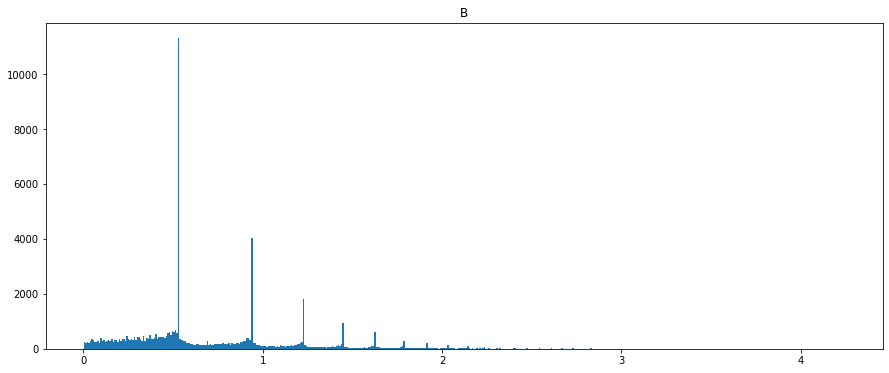

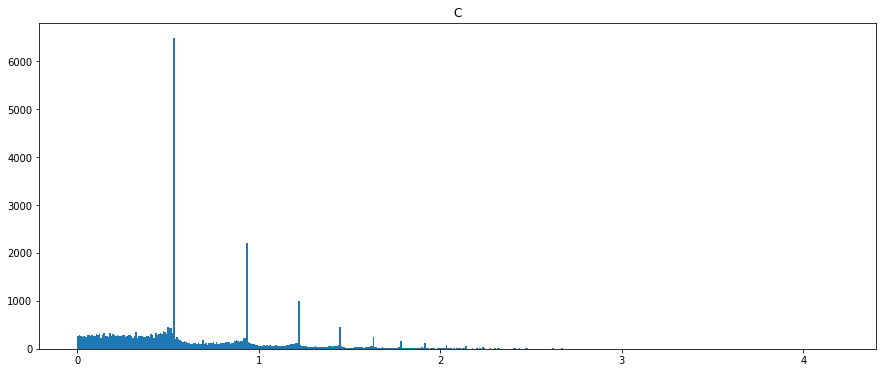

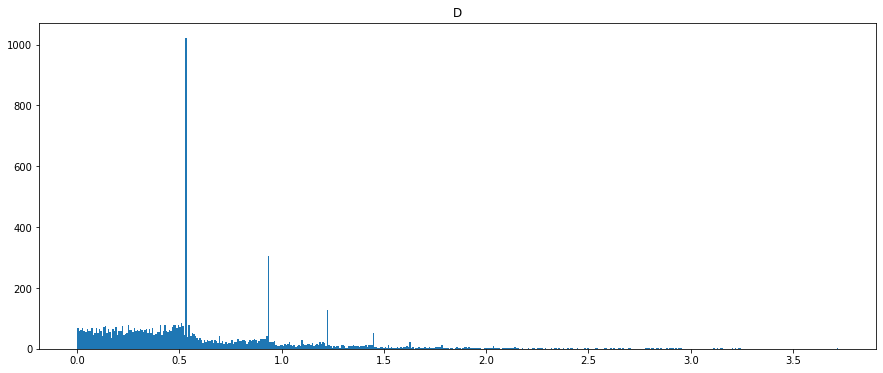

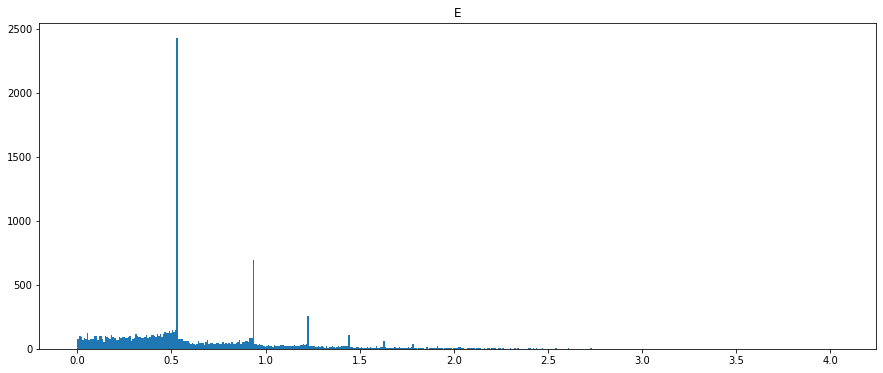

In [37]:
for cat in ['A', 'B', 'C', 'D', 'E']:
    mask = df.NLRT == cat
    x = df.V[mask].values
    plt.figure(figsize=[15, 6])
    plt.hist(np.log(x[x>1]), bins = 500)
    plt.gca().set_title(cat)

In [70]:
mask = df.NLRT == "D"
x = df.V[mask].values

In [71]:
np.histogram(x)

(array([11296824,      418,       40,       18,       13,        5,
               3,        0,        0,        1], dtype=int64),
 array([ 0.    ,  4.1333,  8.2666, 12.3999, 16.5332, 20.6665, 24.7998,
        28.9331, 33.0664, 37.1997, 41.333 ]))

In [72]:
x.min()

0.0

(array([1.0384465e+07, 5.8722000e+05, 1.5536600e+05, 6.3709000e+04,
        3.2276000e+04, 2.0586000e+04, 1.2481000e+04, 8.1110000e+03,
        6.1440000e+03, 5.4360000e+03, 1.1194000e+04, 1.5090000e+03,
        8.1000000e+02, 5.8100000e+02, 5.2400000e+02, 5.3000000e+02,
        5.1300000e+02, 4.1500000e+02, 4.4600000e+02, 4.9600000e+02,
        1.3790000e+03, 2.5900000e+02, 1.6600000e+02, 1.4400000e+02,
        1.3200000e+02, 1.0800000e+02, 1.2400000e+02, 1.2000000e+02,
        1.2900000e+02, 1.3100000e+02, 4.2200000e+02, 9.2000000e+01,
        4.6000000e+01, 5.6000000e+01, 5.3000000e+01, 3.7000000e+01,
        6.4000000e+01, 4.9000000e+01, 4.6000000e+01, 5.3000000e+01,
        5.8000000e+01, 1.5100000e+02, 2.5000000e+01, 2.6000000e+01,
        2.5000000e+01, 1.5000000e+01, 3.5000000e+01, 2.0000000e+01,
        2.0000000e+01, 2.7000000e+01, 2.9000000e+01, 6.6000000e+01,
        1.4000000e+01, 1.3000000e+01, 1.0000000e+01, 1.8000000e+01,
        1.0000000e+01, 7.0000000e+00, 1.0000000e

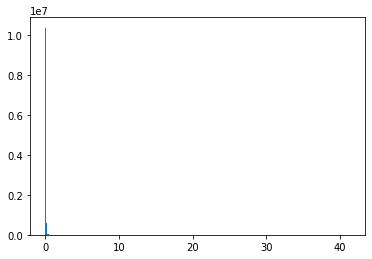

In [73]:
plt.hist(x, bins = 500)

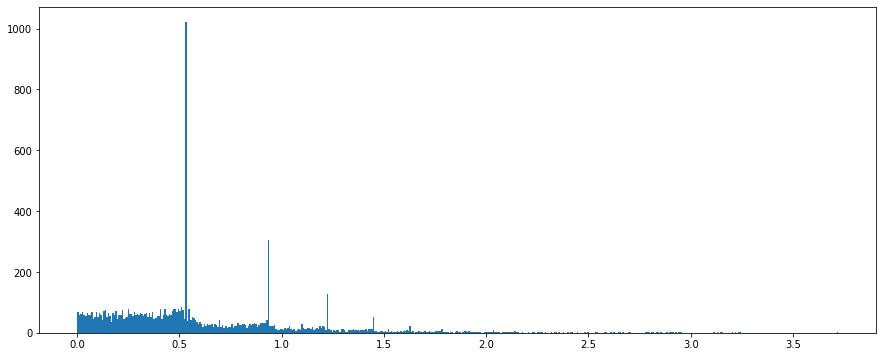

In [74]:
plt.figure(figsize=[15, 6])
h = plt.hist(np.log(x[x>1]), bins = 500)

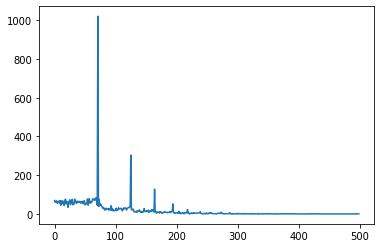

In [75]:
y = h[0]
plt.plot(y)

In [76]:
def step(y):
    i = y.argmax()
    a = y.copy()
    stopped = a[i] - a[:i].max()
    print(stopped / a[i:].sum())
    over = a[i+1:].sum() 
    a[i] -= stopped
    a[i+1:] *= (stopped + over)/over 
    return a

0.21984983575786016


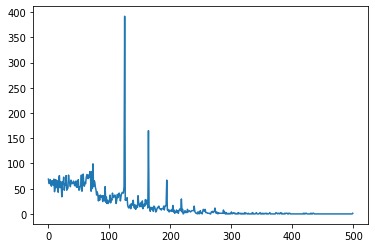

In [77]:
y1 = step(y)
plt.plot(y1)

0.13305978898007034


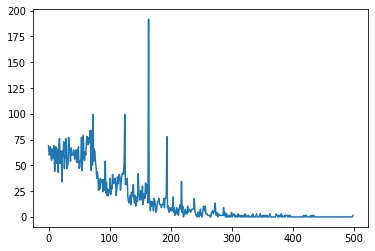

In [78]:
y2 = step(y1)
plt.plot(y2)

0.0733134152511851


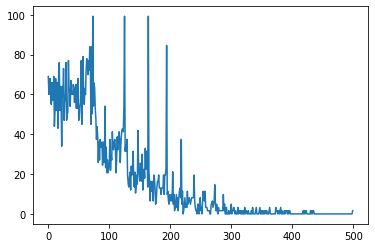

In [79]:
y3 = step(y2)
plt.plot(y3)

0.21984983575786016
0.13305978898007034
0.0733134152511851
0.003697276325322043
0.007083588983147776
0.012840894401092356
0.003609516081921959
0.0011198208286674132
0.001194288897120078
0.0012564011887471948
0.0023949750525540307
0.0042988580409108225
0.007628252010255132
0.00038262865888655066
0.00022396416573348485
0.0002385310990783308
0.00025057032706191735
0.0004769081494727215
0.0008534777544211662
0.0015061745760762868
0.00021283383191183301
0.00022396416573348024
0.00023842237934309843
0.00025033446976310754


D:\python_projects\workon_hrab2\WPy64-3740\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


0.00047621606231159903


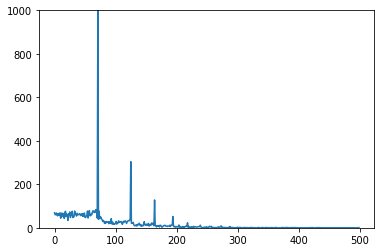

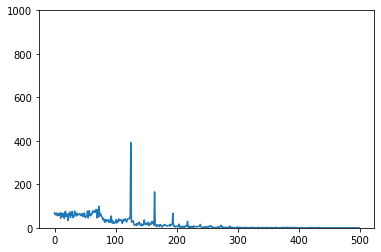

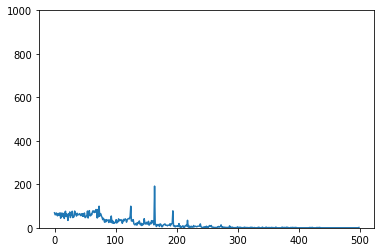

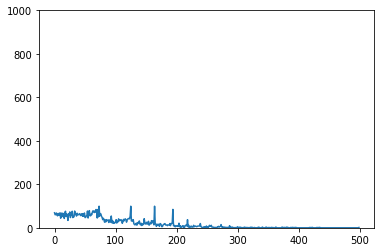

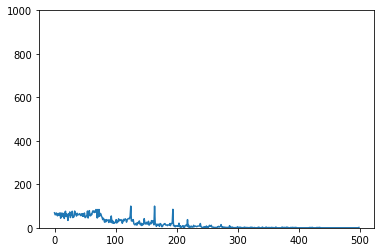

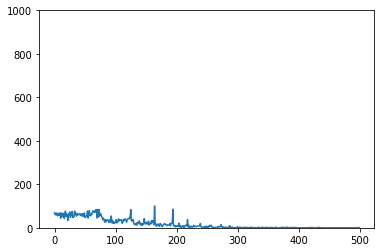

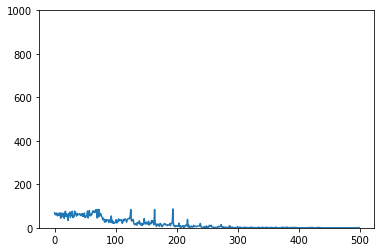

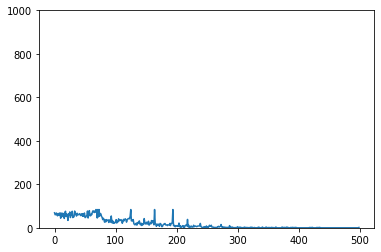

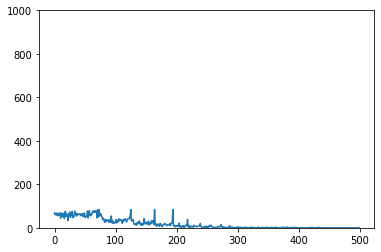

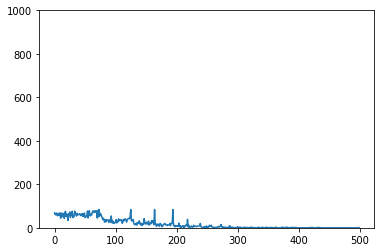

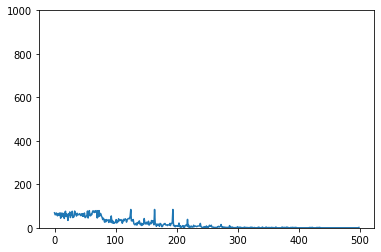

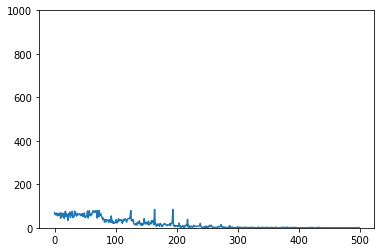

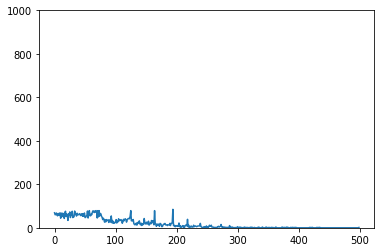

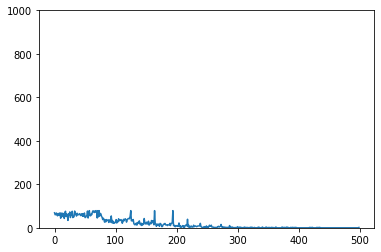

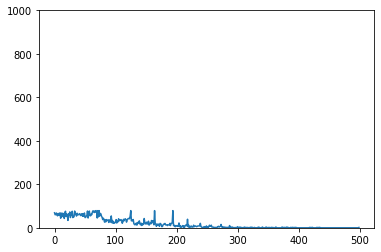

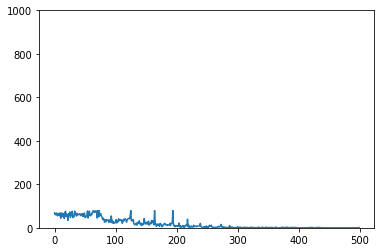

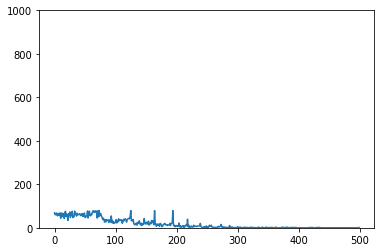

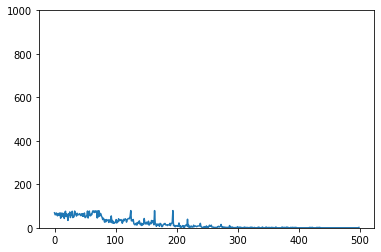

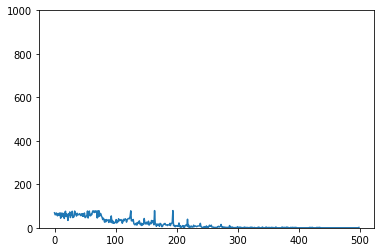

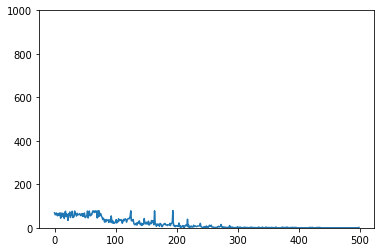

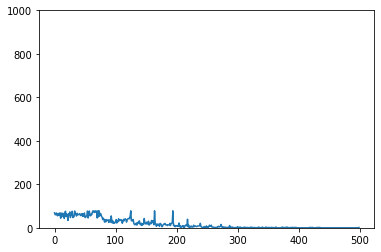

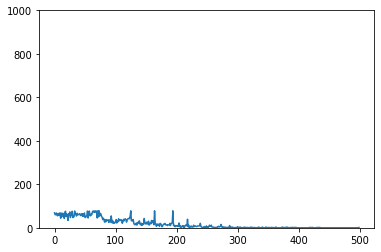

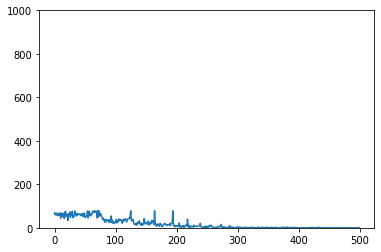

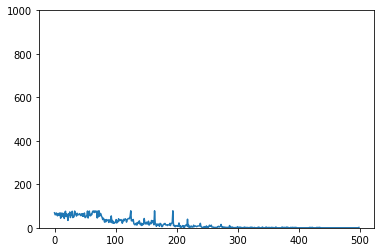

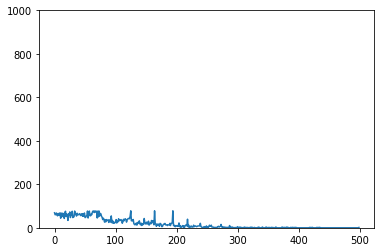

In [85]:
yy = y.copy()
for i in range(25):
    plt.figure()
    ax = plt.gca()
    ax.set_ylim(0, 1000)
    plt.plot(yy)
    yy = step(yy)
    

In [40]:
pd.Series(x).describe()

count    7.518906e+07
mean     3.160520e-02
std      1.779752e-01
min      0.000000e+00
25%      2.000000e-03
50%      6.000000e-03
75%      2.000000e-02
max      9.489500e+01
dtype: float64

In [ ]:
np.histogram(bins = np.)